In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df= pd.read_csv('data_fixed_lat_lon.csv')

In [ ]:
df.keys()

In [3]:
X = df[['latitude','longitude']]
y = df["list_price"]
print(X.shape, y.shape)

(943, 2) (943,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

k: 1, Train/Test Score: 0.926/0.013
k: 3, Train/Test Score: 0.342/0.013
k: 5, Train/Test Score: 0.209/0.004
k: 7, Train/Test Score: 0.146/0.000
k: 9, Train/Test Score: 0.123/0.000
k: 11, Train/Test Score: 0.110/0.000
k: 13, Train/Test Score: 0.099/0.000
k: 15, Train/Test Score: 0.093/0.000
k: 17, Train/Test Score: 0.088/0.000
k: 19, Train/Test Score: 0.079/0.000


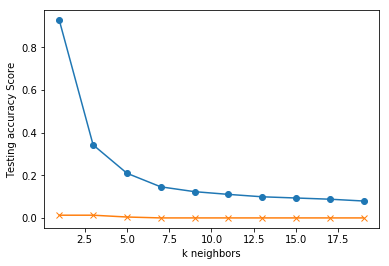

In [5]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.004


In [7]:
df['knn_predict']=np.nan

In [23]:
for i in range(len(listed_df)):
    data = [[listed_df['latitude'][i],listed_df['longitude'][i]]]
    listed_df['knn_predict'][i] = knn.predict(data)

/Users/stevenorn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
new_df = df

In [10]:
new_df.drop(new_df.index[0:24], inplace=True)

In [11]:
new_df = new_df.reset_index(drop=True)

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
model = LinearRegression()

In [43]:
X = listed_df[['beds', 'baths', 'sq_ft','knn_predict']]
# y = listed_df["list_price"]
print(X.shape, y.shape)

(14005, 4) (919,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [17]:
new_df['gnb_predict']=np.nan

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [15]:
### BEGIN SOLUTION
gnb.fit(X, y)
training_score = gnb.score(X, y)
# testing_score = gnb.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")

Training Score: 0.41893362350380847


In [44]:
for i in range(len(listed_df)):
    data = [[ listed_df['beds'][i], listed_df['baths'][i], listed_df['sq_ft'][i],listed_df['knn_predict'][i] ]]
    listed_df['gnb_predict'][i] = gnb.predict(data)

/Users/stevenorn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
gnb.predict(data)

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [19]:
new_df

,Address,list_price,beds,baths,sq_ft,latitude,longitude,knn_predict,gnb_predict
0,"6451 S Sangamon St Chicago, IL 60621",71500.0,9.0,3.0,6156.0,41.776391,-87.648074,71500.0,71500.0
1,"1920 N Sheffield Ave Apt B Chicago, IL 60614",845000.0,2.0,2.5,5700.0,41.916722,-87.653604,437000.0,845000.0
2,"2659 N Dayton St Chicago, IL 60614",905000.0,6.0,4.5,5400.0,41.930755,-87.649805,586500.0,905000.0
3,"4261 Ford City Chicago, IL 60652",34000.0,1.0,1.0,5300.0,41.753945,-87.730524,81000.0,34000.0
4,"1476 W Marcus Ct Park Ridge, IL 60068",350000.0,4.0,7.5,5000.0,42.033979,-87.853258,106500.0,71500.0
5,"3528 N Seeley Ave Chicago, IL 60618",2650000.0,3.0,4.5,4815.0,41.945904,-87.680087,195000.0,2650000.0
6,"710 W Melrose St Chicago, IL 60657",805000.0,6.0,4.0,4800.0,41.941288,-87.647419,394000.0,805000.0
7,"4130 Woodland Ave Western Springs, IL 60558",1925000.0,3.0,3.5,4665.0,41.814027,-87.902946,80000.0,1925000.0
8,"2435 W Augusta Blvd # 1 Chicago, IL 60622",549500.0,2.0,8.5,4544.0,41.899153,-87.688332,315000.0,549500.0
9,"25 E Superior St Apt 3504 Chicago, IL 60611",1841500.0,4.0,4.0,4000.0,41.895348,-87.627216,260000.0,1841500.0


In [ ]:
clf = LogisticRegression(solver='lbfgs').fit(X, y)

In [ ]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
clf.fit(X_train, y_train)
training_score = clf.score(X_train, y_train)
testing_score = clf.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
new_df

In [20]:
listed_df=pd.read_csv('market_data_full_clean.csv')

In [21]:
listed_df['knn_predict']=np.nan
listed_df['gnb_predict']=np.nan

In [31]:
for i in range(len(listed_df['sq_ft'])):
    listed_df['sq_ft'][i] = listed_df['sq_ft'][i].replace(',','')

/Users/stevenorn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
listed_df.to_csv('predicted_prices.csv')

In [16]:
from sklearn.externals import joblib
joblib.dump(knn, 'knn.joblib') 
joblib.dump(gnb, 'gnb.joblib') 

['gnb.joblib']